In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
airline_train = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\AIML\airline-train.csv", header=0)

# Copy the file to back-up

airline_train_bk=airline_train.copy()

# Display first 5 rows in the dataset

airline_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
airline_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [14]:
airline_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [6]:
airline_train['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
446.0        1
920.0        1
345.0        1
406.0        1
484.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

In [7]:
from sklearn.impute import KNNImputer
imputer_knn=KNNImputer()
airline_train['Arrival Delay in Minutes']=imputer_knn.fit_transform(airline_train[['Arrival Delay in Minutes']])
airline_train['Arrival Delay in Minutes']=airline_train['Arrival Delay in Minutes'].astype(int)

In [8]:
del airline_train['Unnamed: 0']
del airline_train['id']

In [9]:
airline_train.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

In [10]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Target_count = airline_train.satisfaction.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total loans Trans:', len(airline_train))

Class 0: 58879
Class 1: 45025
Proportion: 1.31 : 1
Total loans Trans: 103904


In [11]:
catg=airline_train.columns[airline_train.dtypes =='object']
print(catg)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [12]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
airline_train['Gender']=lb.fit_transform(airline_train['Gender'])
airline_train['Customer Type']=lb.fit_transform(airline_train['Customer Type'])
airline_train['Type of Travel']=lb.fit_transform(airline_train['Type of Travel'])
airline_train['satisfaction']=lb.fit_transform(airline_train['satisfaction'])

In [13]:
#use labelencoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
airline_train['Class']=le.fit_transform(airline_train[['Class']])

In [12]:
airline_train['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [13]:
airline_train['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [7]:
#use labelencoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
airline_train['Class']=le.fit_transform(airline_train[['Class']])

In [13]:
airline_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             103904 non-null  int32
 1   Customer Type                      103904 non-null  int32
 2   Age                                103904 non-null  int64
 3   Type of Travel                     103904 non-null  int32
 4   Class                              103904 non-null  int32
 5   Flight Distance                    103904 non-null  int64
 6   Inflight wifi service              103904 non-null  int64
 7   Departure/Arrival time convenient  103904 non-null  int64
 8   Ease of Online booking             103904 non-null  int64
 9   Gate location                      103904 non-null  int64
 10  Food and drink                     103904 non-null  int64
 11  Online boarding                    103904 non-null  int64
 12  Se

In [14]:
airline_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1


In [17]:
IndepVar = []
for col in airline_train.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_train =airline_train[IndepVar]
y_train=airline_train[TargetVar]

In [18]:
IndepVar = []
for col in airline_test.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_test =airline_test[IndepVar]
y_test=airline_test[TargetVar]

In [19]:
from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)


x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [20]:
AIRLINE_Results = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\HTResults.csv", header=0)
AIRLINE_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 9233  2170]
 [ 1178 13395]]
Outcome values : 
 9233 2170 1178 13395
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.81      0.85     11403
           0       0.86      0.92      0.89     14573

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Accuracy : 87.1 %
Precision : 88.7 %
Recall : 81.0 %
F1 Score : 0.847
Specificity or True Negative Rate : 91.9 %
Balanced Accuracy : 86.4 %
MCC : 0.738
roc_auc_score: 0.864


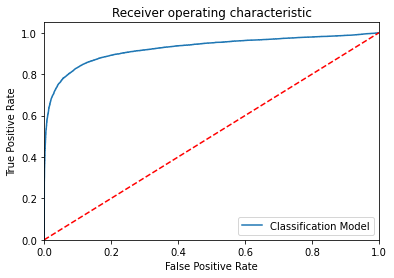

Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[10610   793]
 [  957 13616]]
Outcome values : 
 10610 793 957 13616
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.93      0.92     11403
           0       0.94      0.93      0.94     14573

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy : 93.3 %
Precision : 91.7 %
Recall : 93.0 %
F1 Score : 0.924
Specificity or True Negative Rate : 93.4 %
Balanced Accuracy : 93.2 %
MCC : 0.864
roc_auc_score: 0.932


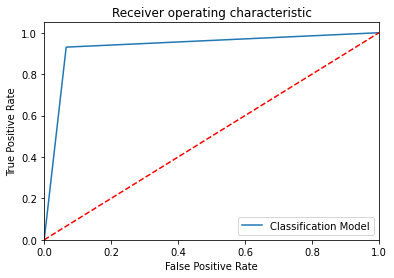

Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[10679   724]
 [  299 14274]]
Outcome values : 
 10679 724 299 14274
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.1 %
Precision : 97.3 %
Recall : 93.7 %
F1 Score : 0.954
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.8 %
MCC : 0.92
roc_auc_score: 0.958


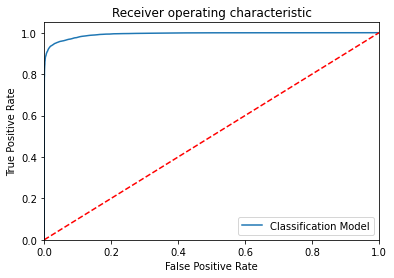

Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10713   690]
 [  292 14281]]
Outcome values : 
 10713 690 292 14281
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.3 %
Recall : 93.9 %
F1 Score : 0.956
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 96.0 %
MCC : 0.923
roc_auc_score: 0.96


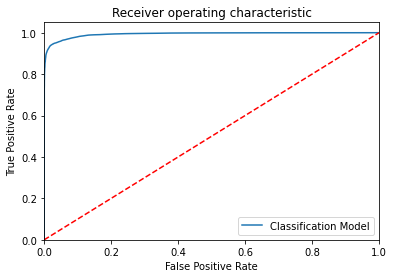

Model Name:  GaussianNB()
Confusion matrix : 
 [[ 9094  2309]
 [ 1287 13286]]
Outcome values : 
 9094 2309 1287 13286
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.80      0.83     11403
           0       0.85      0.91      0.88     14573

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976

Accuracy : 86.2 %
Precision : 87.6 %
Recall : 79.8 %
F1 Score : 0.835
Specificity or True Negative Rate : 91.2 %
Balanced Accuracy : 85.5 %
MCC : 0.719
roc_auc_score: 0.855


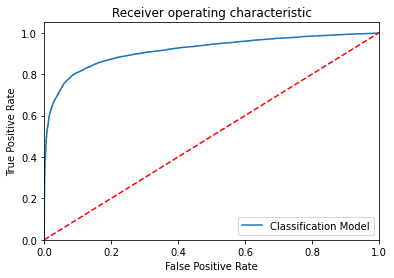

Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[10055  1348]
 [  460 14113]]
Outcome values : 
 10055 1348 460 14113
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.88      0.92     11403
           0       0.91      0.97      0.94     14573

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy : 93.0 %
Precision : 95.6 %
Recall : 88.2 %
F1 Score : 0.918
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 92.5 %
MCC : 0.86
roc_auc_score: 0.925


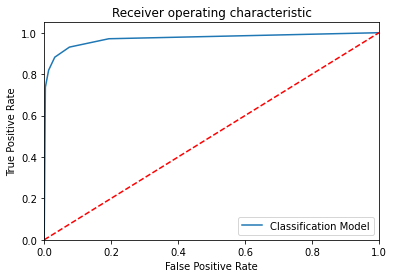

Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[ 9227  2176]
 [ 1113 13460]]
Outcome values : 
 9227 2176 1113 13460
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.81      0.85     11403
           0       0.86      0.92      0.89     14573

    accuracy                           0.87     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Accuracy : 87.3 %
Precision : 89.2 %
Recall : 80.9 %
F1 Score : 0.849
Specificity or True Negative Rate : 92.4 %
Balanced Accuracy : 86.6 %
MCC : 0.743
roc_auc_score: 0.866


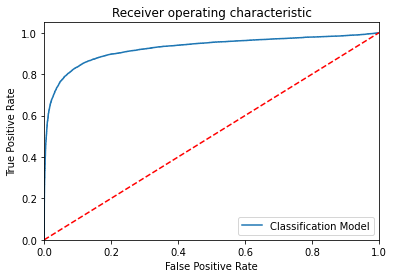

Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[10318  1085]
 [  774 13799]]
Outcome values : 
 10318 1085 774 13799
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.90      0.92     11403
           0       0.93      0.95      0.94     14573

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy : 92.8 %
Precision : 93.0 %
Recall : 90.5 %
F1 Score : 0.917
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 92.6 %
MCC : 0.855
roc_auc_score: 0.926


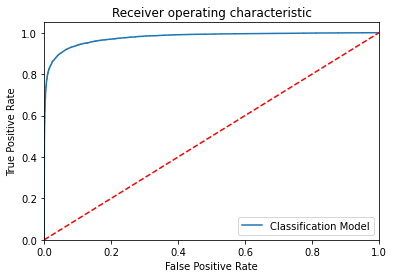

Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[10725   678]
 [  601 13972]]
Outcome values : 
 10725 678 601 13972
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.94      0.94     11403
           0       0.95      0.96      0.96     14573

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Accuracy : 95.1 %
Precision : 94.7 %
Recall : 94.1 %
F1 Score : 0.944
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 95.0 %
MCC : 0.9
roc_auc_score: 0.95


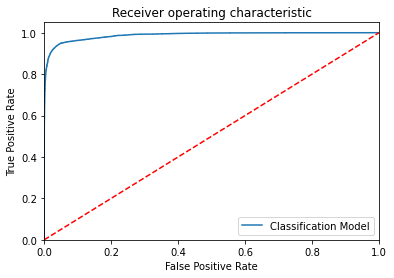

Model Name:  LGBMClassifier()
Confusion matrix : 
 [[10685   718]
 [  279 14294]]
Outcome values : 
 10685 718 279 14294
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.5 %
Recall : 93.7 %
F1 Score : 0.955
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 95.9 %
MCC : 0.922
roc_auc_score: 0.959


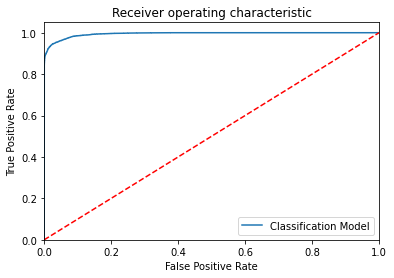

Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[10665   738]
 [  382 14191]]
Outcome values : 
 10665 738 382 14191
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.95      0.97      0.9

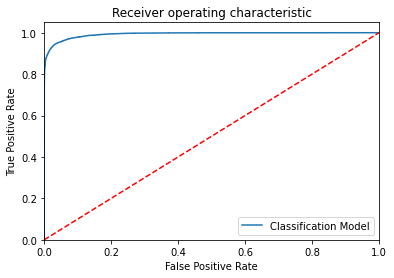

In [31]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier


# Build the model

ModelLGB = lgb.LGBMClassifier()




# Create objects of classification algorithm with default hyper-parameters

ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelLGB = lgb.LGBMClassifier()
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET=ExtraTreesClassifier()
modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
bankdataSVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
bankdataSVMPoly = SVC(kernel='poly', degree=2, probability=True)
bankdataSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight=
'balanced', probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF,ModelET,modelGNB,ModelKNN,bankdataSVM,bankdataSVMPoly,bankdataSVMGaussian,ModelLGB,ModelXGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
   
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    AIRLINE_Results = AIRLINE_Results.append(new_row, ignore_index=True)

In [30]:
AIRLINE_Results.to_csv("C://Users//kisho//OneDrive//Desktop//EMResults_32.csv")

AIRLINE_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),9233,2170,1178,13395,0.871,0.887,0.810,0.847,0.919,0.738,0.864432,0.864
1,DecisionTreeClassifier(),10597,806,961,13612,0.932,0.917,0.929,0.923,0.934,0.862,0.931686,0.932
2,"(DecisionTreeClassifier(max_features='sqrt', r...",10664,739,302,14271,0.960,0.972,0.935,0.953,0.979,0.919,0.957235,0.957
3,"(ExtraTreeClassifier(random_state=1503676611),...",10724,679,286,14287,0.963,0.974,0.940,0.957,0.980,0.925,0.960414,0.960
4,GaussianNB(),9094,2309,1287,13286,0.862,0.876,0.798,0.835,0.912,0.719,0.854598,0.855
5,KNeighborsClassifier(),10055,1348,460,14113,0.930,0.956,0.882,0.918,0.968,0.860,0.925110,0.925
6,"SVC(kernel='linear', probability=True)",9227,2176,1113,13460,0.873,0.892,0.809,0.849,0.924,0.743,0.866399,0.866
7,"SVC(degree=2, kernel='poly', probability=True)",10318,1085,774,13799,0.928,0.930,0.905,0.917,0.947,0.855,0.925869,0.926
8,"SVC(class_weight='balanced', probability=True,...",10725,678,601,13972,0.951,0.947,0.941,0.944,0.959,0.900,0.949651,0.950
9,LGBMClassifier(),10685,718,279,14294,0.962,0.975,0.937,0.955,0.981,0.922,0.958945,0.959


In [8]:
airline_test=pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\airline-test.csv",header=0)

airline_test_bk=airline_test.copy()
airline_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [9]:
airline_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [10]:
airline_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [11]:
from sklearn.impute import KNNImputer
imputer_knn=KNNImputer()
airline_test['Arrival Delay in Minutes']=imputer_knn.fit_transform(airline_test[['Arrival Delay in Minutes']])
airline_test['Arrival Delay in Minutes']=airline_test['Arrival Delay in Minutes'].astype(int)

In [12]:
del airline_test['Unnamed: 0']
del airline_test['id']


In [13]:
airline_test.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3281
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            313
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

In [14]:
catg=airline_test.columns[airline_test.dtypes =='object']
print(catg)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [15]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
airline_test['Gender']=lb.fit_transform(airline_test['Gender'])
airline_test['Customer Type']=lb.fit_transform(airline_test['Customer Type'])
airline_test['Type of Travel']=lb.fit_transform(airline_test['Type of Travel'])
airline_test['satisfaction']=lb.fit_transform(airline_test['satisfaction'])

In [ ]:
airline_test['Gender'] = airline_test['Gender'].str.replace('Female', '0')
airline_test['Gender'] = airline_test['Gender'].str.replace('Male', '1')

In [ ]:
airline_test['Customer Type'] = airline_test['Customer Type'].str.replace('Loyal Customer', '1')
airline_test['Customer Type'] = airline_test['Customer Type'].str.replace('disloyal Customer', '0')

In [ ]:
airline_test['Type of Travel'] = airline_test['Type of Travel'].str.replace('Business travel', '0')
airline_test['Type of Travel'] = airline_test['Type of Travel'].str.replace('Personal Travel', '1')

In [ ]:
airline_test['satisfaction'] = airline_test['satisfaction'].str.replace('neutral or dissatisfied', '0')
airline_test['satisfaction'] = airline_test['satisfaction'].str.replace('satisfied', '1')

In [ ]:
# Convert 'Geography' and 'Gender' to numerical format using one hot encoding

airline_test = pd.get_dummies(airline_test, columns=['Gender','Customer Type','Type of Travel',])
airline_test.head()

In [25]:
airline_test['satisfaction'].value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

In [16]:
#use labelencoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
airline_test['Class']=le.fit_transform(airline_test[['Class']])

In [27]:
airline_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44,1
1,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0,1
2,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0,0
3,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6,1
4,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,0,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0,0
25972,1,0,23,0,0,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0,1
25973,0,0,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0,0
25974,1,0,14,0,0,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0,1


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
ModelET=ExtraTreesClassifier()

In [31]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]



# Create the random grid

random_grid = {'n_estimators': n_estimators}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [37]:
# Create model object

ModelET = ExtraTreesClassifier()

ModelET_randomcv=RandomizedSearchCV(estimator=ModelET, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelET_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [38]:
# best or the optimal values of the parameters for which the model performed the best

ModelET_randomcv.best_params_

{'n_estimators': 1400}

Confusion matrix : 
 [[10710   693]
 [  293 14280]]
Outcome values : 
 10710 693 293 14280
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.3 %
Recall : 93.9 %
F1 Score : 0.956
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 96.0 %
MCC : 0.923
roc_auc_score: 0.96


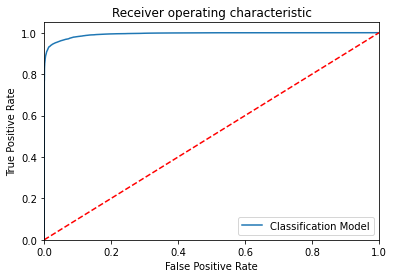

-----------------------------------------------------------------------------------------------------


In [39]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with RandomizedSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=1400)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}

In [40]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {
           'n_estimators': [1150, 1200, 1250, 1300,1350]}

# Create object for model

ModelET = ExtraTreesClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelET, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [41]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'n_estimators': 1150}

Confusion matrix : 
 [[10719   684]
 [  302 14271]]
Outcome values : 
 10719 684 302 14271
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.3 %
Recall : 94.0 %
F1 Score : 0.956
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 96.0 %
MCC : 0.923
roc_auc_score: 0.96


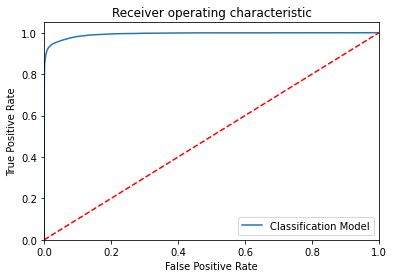

-----------------------------------------------------------------------------------------------------


In [42]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=1150)
                   

# Train the model with train data

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}

Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[10662   741]
 [  300 14273]]
Outcome values : 
 10662 741 300 14273
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.95      0.98      0.96     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.0 %
Precision : 97.3 %
Recall : 93.5 %
F1 Score : 0.953
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.7 %
roc_auc_score: 0.957


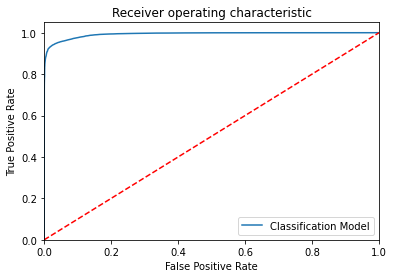

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10692   711]
 [  287 14286]]
Outcome values : 
 10692 711 287 14286
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.4 %
Recall : 93.8 %
F1 Score : 0.955
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 95.9 %
roc_auc_score: 0.959


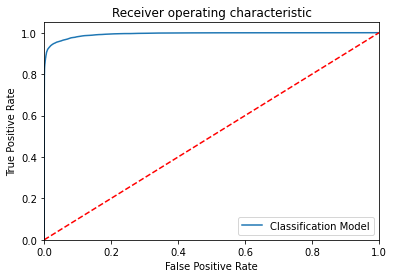

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[10685   718]
 [  279 14294]]
Outcome values : 
 10685 718 279 14294
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.5 %
Recall : 93.7 %
F1 Score : 0.955
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 95.9 %
roc_auc_score: 0.959


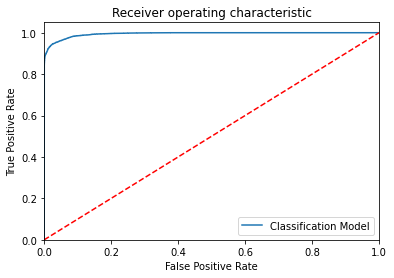

-----------------------------------------------------------------------------------------------------


In [49]:
# Build the Calssification models with Over Sampling and compare the results



from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb

# Create objects of classification algorithms with default hyper-parameters


ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithm

MM = [ModelRF, ModelET, ModelLGB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    AIRLINE_Results = AIRLINE_Results.append(new_row, ignore_index=True)
    

In [48]:
AIRLINE_Results = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\HTResults.csv", header=0)
AIRLINE_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [50]:
AIRLINE_Results.to_csv("C://Users//kisho//OneDrive//Desktop//HT_777.csv")

AIRLINE_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",10662,741,300,14273,0.960,0.973,0.935,0.953,0.979,0.92,0.957216,0.957
1,"(ExtraTreeClassifier(random_state=1294169321),...",10692,711,287,14286,0.962,0.974,0.938,0.955,0.980,0.92,0.958977,0.959
2,LGBMClassifier(),10685,718,279,14294,0.962,0.975,0.937,0.955,0.981,0.92,0.958945,0.959


Confusion matrix : 
 [[10704   699]
 [  278 14295]]
Outcome values : 
 10704 699 278 14295
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.5 %
Recall : 93.9 %
F1 Score : 0.956
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 96.0 %
MCC : 0.924
roc_auc_score: 0.96


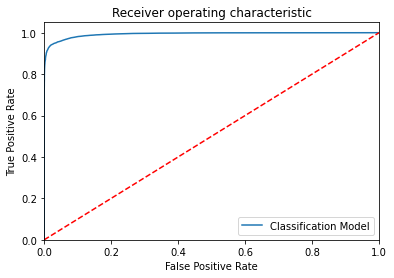

In [25]:
# To build the 'Logistic Regression' model with random sampling
from sklearn.ensemble import ExtraTreesClassifier

# Create an object for model

ModelLET = ExtraTreesClassifier()

# Train the model

ModelLET.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLET.predict(x_test)
y_pred_prob = ModelLET.predict_proba(x_test)
# To display the algorithm paramaters

params = ModelLET.get_params()

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : 'EXTRAA TREES CLASSIFIER',
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
AIRLINE_Results = AIRLINE_Results.append(new_row, ignore_index=True)

In [26]:
AIRLINE_Results.to_csv("C://Users//kisho//OneDrive//Desktop//HT_777.csv")

AIRLINE_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,EXTRAA TREES CLASSIFIER,10704,699,278,14295,0.962,0.975,0.939,0.956,0.981,0.924,0.959812,0.96


Confusion matrix : 
 [[10685   718]
 [  279 14294]]
Outcome values : 
 10685 718 279 14294
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.5 %
Recall : 93.7 %
F1 Score : 0.955
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 95.9 %
MCC : 0.922
roc_auc_score: 0.959


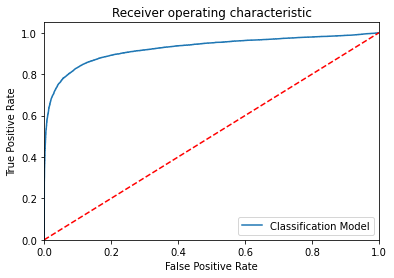

In [35]:
# To build the 'Logistic Regression' model with random sampling
import lightgbm as lgb

# Create an object for model

ModelLGB = lgb.LGBMClassifier()

# Train the model

ModelLGB.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLGB.predict(x_test)
y_pred_prob = ModelLGB.predict_proba(x_test)
# To display the algorithm paramaters

params = ModelLGB.get_params()

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Confusion matrix : 
 [[10681   722]
 [  299 14274]]
Outcome values : 
 10681 722 299 14274
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.1 %
Precision : 97.3 %
Recall : 93.7 %
F1 Score : 0.954
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.8 %
MCC : 0.92
roc_auc_score: 0.958


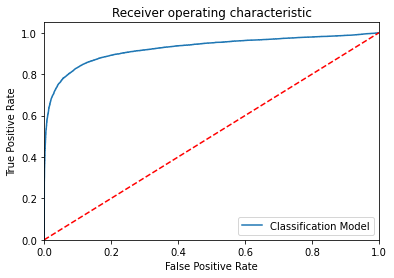

In [37]:
# To build the 'Logistic Regression' model with random sampling
from sklearn.ensemble import RandomForestClassifier

# Create an object for model

ModelLRF = RandomForestClassifier()

# Train the model

ModelLRF.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLRF.predict(x_test)
y_pred_prob = ModelLRF.predict_proba(x_test)
# To display the algorithm paramaters

params = ModelLRF.get_params()

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
